# **Project Documentation: Thyroid Cancer Risk Assessment**

### **Environment Setup**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Dataset Selection and Objective Definition**
I have selected the Thyroid Cancer Risk Dataset from Kaggle, which provides comprehensive clinical data on patients diagnosed with well-differentiated thyroid cancer. The dataset includes crucial attributes like Age, Gender, TSH Level, T3 Level, T4 Level, and Nodule Size, among a total of 17 columns across 212,691 entries. This rich dataset allows for detailed analysis of factors influencing thyroid cancer recurrence.

Obejective: Develop a model to classify patients into different risk levels of thyroid cancer progression based on their detailed diagnosis at the time of initial treatment. This model will help in predicting the severity and likely progression rate of the disease, which can directly influence treatment decisions and patient monitoring strategies.

Diagnosis: Detailed categorization of thyroid cancer type and stage.
Additional Clinical Data: TSH, T3, T4 levels, nodule size, age, gender, and other relevant clinical parameters provided in the dataset.
Patient Demographics: Information such as ethnicity and family history, which can contribute to the risk assessment.

## **Data Preprocessing**

**Data Integration and Initial Exploration**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AIG/ML_Project/thyroid_cancer_risk_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212618 non-null  object 
 10  Diabetes             212612 non-null  object 
 11  TSH_Level            212652 non-null  float64
 12  T3_Level             212660 non-null  float64
 13  T4_Level             212652 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,73


In [ ]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212652.000000,212660.000000,212652.000000,212691.000000
mean,106346.00000,51.918497,5.045111,2.001728,8.246252,2.503403
std,61398.74739,21.632815,2.860280,0.866257,2.164124,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.530000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


**Keep outlier**

Outliers in medical data often represent rare, severe, or advanced stages of a condition. they often represent unique or severe cases. Including these outliers enhances model robustness, ensures comprehensive disease understanding, and supports the development of personalized treatment strategies.

**Using Pipeline in Preprocessing Data**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

df.columns=df.columns.str.lower()
df=df.drop(columns=['patient_id'],axis=1)
target="diagnosis"
df=df.dropna(subset=[target])
x=df.drop(target,axis=1)
y=df[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

numeric_cols = x.select_dtypes(include=["int64", "float64"]).columns

nominal_cols = x.select_dtypes(include=["object"]).columns

numeric_transform=Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('encoder',StandardScaler())
])

nominal_transforms=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

process_data=ColumnTransformer([
    ("numeric",numeric_transform,numeric_cols),
    ("norminal",nominal_transforms,nominal_cols)

])

**Balance Sampling**

The RandomOverSampler from imblearn is used to balance class distribution in a dataset by randomly duplicating examples in the minority class. In the given code, it resamples x_train and y_train to equalize the number of instances across classes, improving model performance on imbalanced datasets.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sampling=RandomOverSampler(random_state=42)
x_train,y_train=sampling.fit_resample(x_train,y_train)

Visualization Data

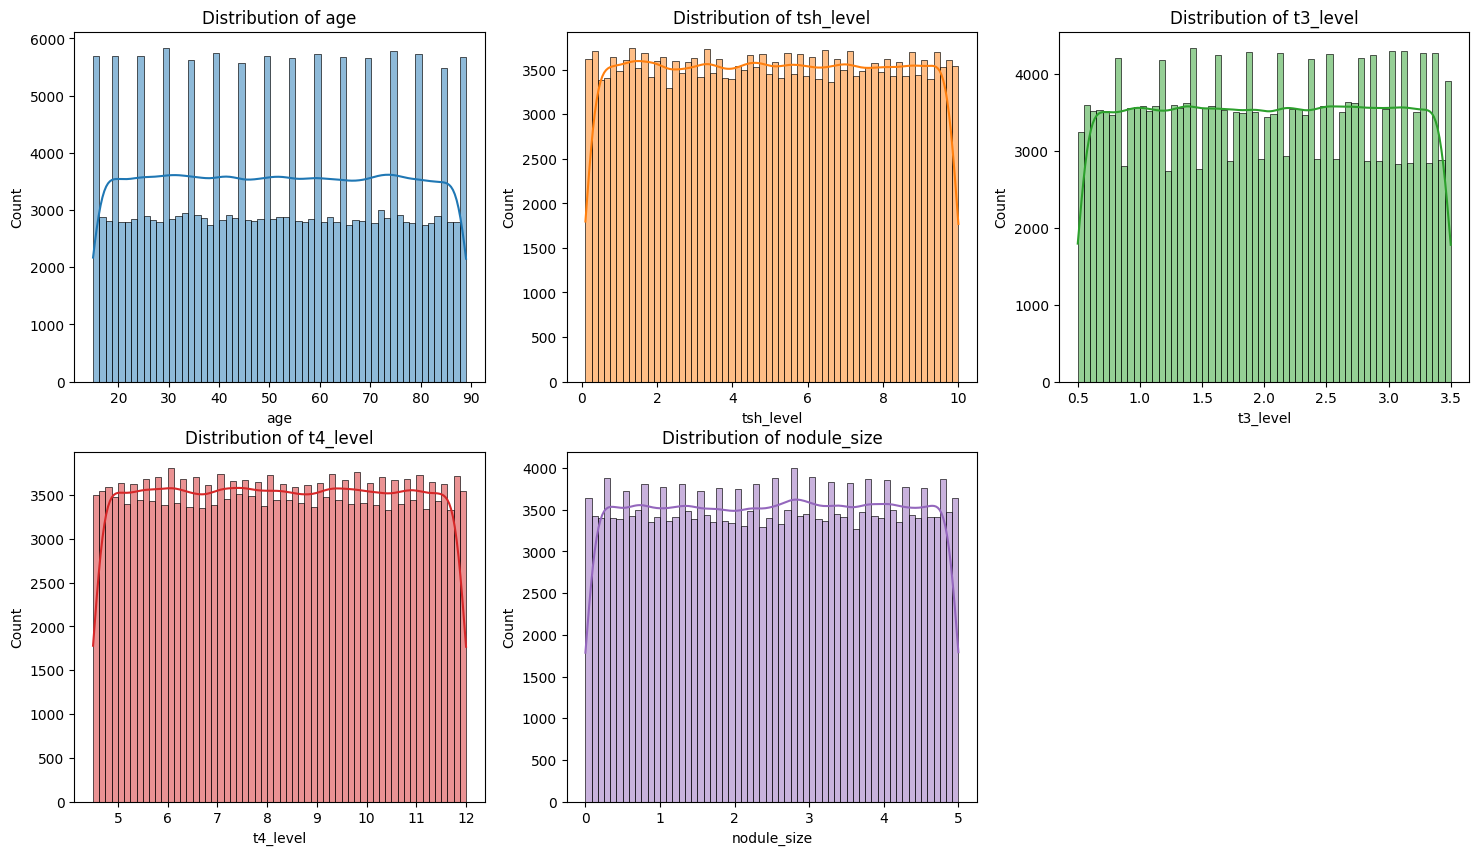

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color=f"C{i}")
    plt.title(f'Distribution of {col}')

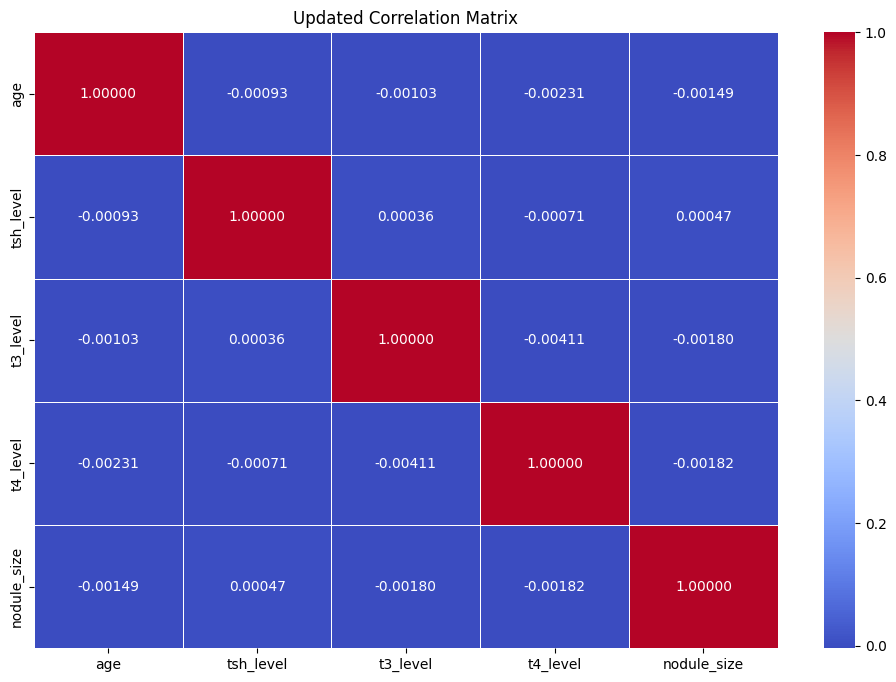

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".5f", linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

## **Model Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model_LogisticRegression=Pipeline([
    ('process',process_data),
    ('model',LogisticRegression())
])

model_KNN=Pipeline([
    ('process',process_data),
    ('model',KNeighborsClassifier(n_neighbors=5))
])


## **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_LogisticRegression.fit(x_train, y_train)
y_predict_LR = model_LogisticRegression.predict(x_test)

model_KNN.fit(x_train, y_train)
y_predict_KNN = model_KNN.predict(x_test)

print('--------------------------------------------------')
print("Report for Logistic Regression:")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predict_LR)))
print("Precision: {:.2f}".format(precision_score(y_test, y_predict_LR, average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, y_predict_LR, average='weighted')))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_predict_LR, average='weighted')))

print('--------------------------------------------------')
print("Report for KNN:")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predict_KNN)))
print("Precision: {:.2f}".format(precision_score(y_test, y_predict_KNN, average='weighted')))
print("Recall: {:.2f}".format(recall_score(y_test, y_predict_KNN, average='weighted')))
print("F1-Score: {:.2f}".format(f1_score(y_test, y_predict_KNN, average='weighted')))


--------------------------------------------------
Report for Logistic Regression:
Accuracy: 0.83
Precision: 0.81
Recall: 0.83
F1-Score: 0.81
--------------------------------------------------
Report for KNN:
Accuracy: 0.65
Precision: 0.73
Recall: 0.65
F1-Score: 0.67


## **Create visualizations to present**

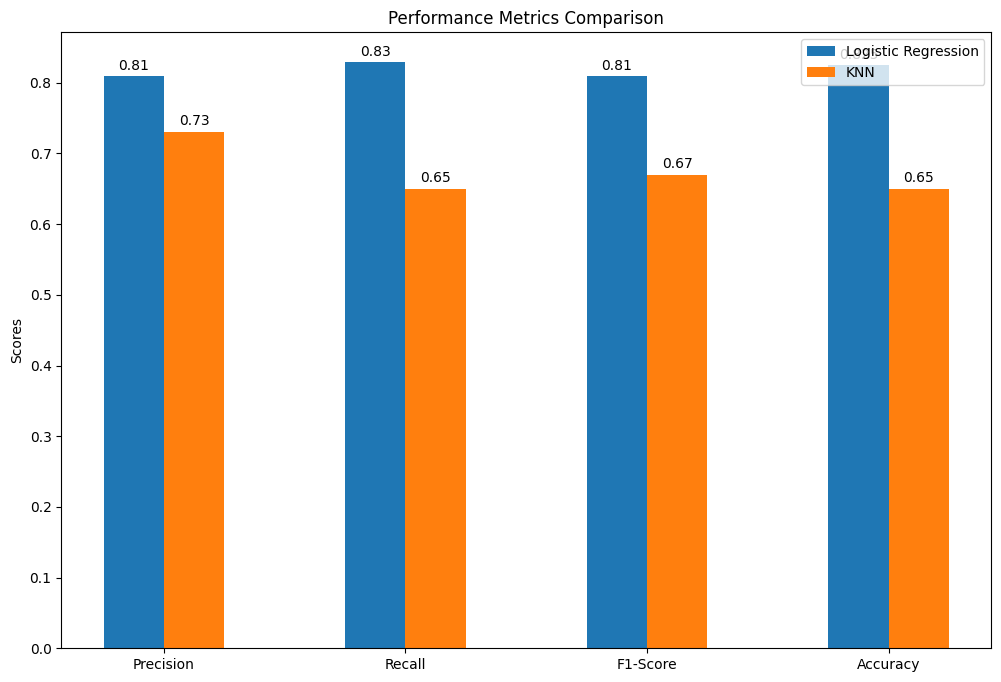

In [40]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
logistic_metrics = [0.81, 0.83, 0.81, 0.825]
knn_metrics = [0.73, 0.65, 0.67, 0.65]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, logistic_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, knn_metrics, width, label='KNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=3)

plt.show()


# **Data** Analysis Report
1. **Introduction**

The Thyroid Cancer Risk Dataset from Kaggle, comprehensive clinical data on patients diagnosed with early thyroid cancer, has been selected for analysis. This dataset is containing 17 columns and 212,691 entries, and includes critical attributes such as Age, Gender, TSH Level, T3 Level, T4 Level, and Nodule Size. Such detailed information facilitates an in-depth analysis of factors that may influence thyroid cancer recurrence.

The objective is to create a predictive model that classifies patients into different risk categories for thyroid cancer progression based on detailed initial diagnoses. This model is designed to identify early indicators of thyroid cancer, facilitating the choice of optimal treatment strategies and minimizing associated risks.

Dataset Source: https://www.kaggle.com/datasets/slmsshk/medical-students-dataset/data

2. **Data Preprocessing**

*  The dataset preprocessing involves vital steps to ensure accuracy and consistency in analysis. **Pipelines** in scikit-learn which is a function in allows the sequential a list of transformers to preprocess data efficiently. This function helps maintain consistency, reduces manual errors, and enhances the machine learning workflow.

*   Association with the Imputer function, now known as SimpleImputer, is used to handle missing values in datasets. Handling missing values is particularly crucial. An efficient way to manage missing data during preprocessing is by using SimpleImputer within these pipelines.

*   Incorporating StandardScaler and OneHotEncoder into the preprocessing pipeline ensures effective normalization of numerical data and appropriate conversion of categorical variables.

3. **Model Implementation**

*   Logistic Regression and KNN (K-Nearest Neighbors) are two models chosen to perform classification tasks for predicting thyroid cancer.

*   Logistic Regression is a linear model, is well-suited for classification problems.On the other hand, KNN operates by examining the labels of the nearest data points, making it effective for capturing complex patterns in datasets.

4. **Model Evaluation**
--------------------------------------------------
Metrics for Logistic Regression:
*  Accuracy: 0.83
*  Precision: 0.81
*  Recall: 0.83
*  F1-Score: 0.81

--------------------------------------------------
Metrics for KNN:
*  Accuracy: 0.65
*  Precision: 0.73
*  Recall: 0.65
*  F1-Score: 0.67

**Comapration models:**

The Logistic Regression model is more effective than the KNN model across all key metrics (accuracy, precision, recall, and F1-score) for classifying thyroid cancer risk. With an accuracy of 82.51% compared to KNN's 64.55%, Logistic Regression offers a more reliable solution for medical diagnostics where accurate risk assessment is crucial.

In contrast, the KNN model's precision of 73% indicates that the model requires further improvement in predicting positive outcomes.

5. **Results Interpretation**
**Logistic Regression Model:**

*   Accuracy: approximately 82.51%. This indicates a high level of overall correctness in predictions, suggesting that the model is reliable.
*   Precision: With a precision of 81.23%, the model shows a strong ability to deliver positive predictions that are truly positive.
*   Recall:82.51% .High number recall means the model successfully captures a large proportion of patients at risk
*   F1-Score: 81.06% suggests a balanced relationship between precision and recall indicating that the model is good performance across various aspects of the classification task.

**KNN Model:**

*   Accuracy: The KNN model shows lower number accuracy of 64.55%. It mean that model face to challenges in consistently classifying patients correctly.
*   Precision: 73% shows that model need more room for improvement, especially in correctly predicting patients at risk.
*   Recall: 65% indicates that the model misses a number of actual positive cases
*   F1-Score: 67% further confirms that the model struggles with balancing precision and recall, leading to less reliable predictions.


## **Conclusion**

Logistic Regression and KNN models for predicting thyroid cancer risk indicates that Logistic Regression model is well performance than KNN model for all key metrics. This mean that Logistic Regression model effective and reliability make it highly suitable for medical diagnostics, where accurate risk assessment is crucial. Meanwhile, the KNN model needs further improvement to meet the demands of precise and reliable in prediction.

**Potential Implications in Real-World Scenarios**

* The model requires collaboration across departments, including staff, healthcare professionals, data scientists, and data engineers.
* All employee need proper training to interpret and apply model predictions in clinical decision-making.
* Data scientists must ensure continuous model refinement and validation for improving accuracy.
* Policy and compliance teams should oversee data governance to align with privacy regulations.
* Integrating these elements ensures a reliable, ethical, and efficient application of the model in healthcare settings.


# Reflection

Challenges Faced and Solutions:

* Handling missing values was a key challenge, as incomplete data could affect model accuracy. This was addressed using SimpleImputer in the preprocessing pipeline to ensure consistent data handling.

* Handling Outliers: In healthcare, outliers are important as they may represent critical cases. Instead of removing them, they were retained to help the model learn patterns and characteristics essential for accurate predictions.

* Imbalanced Data: The dataset had an imbalance in classification labels, which could bias the model. This issue was mitigated using RandomOverSampler to balance the training data and improve model performance.

*  Model Selection and Performance: Finding the best model required extensive experimentation. Logistic Regression outperformed KNN, highlighting the importance of selecting the appropriate algorithm for the dataset.












  















2.   List item


2.   List item


2.   List item





